In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import yeojohnson

In [3]:
dataset = pd.read_csv('../Datasets/SampleSuperstore.csv')

In [4]:
dataset.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

# 1.) Exploratory Data Analysis

In [5]:
dataset.shape

(9994, 13)

In [6]:
cont_dataset = dataset[['Sales', 'Profit', 'Quantity', 'Discount']]
cont_features = cont_dataset.columns

In [7]:
cat_dataset = dataset.drop(cont_features, axis=1)
cat_features = cat_dataset.columns

## 1.1) Exploring Continuous Features

In [8]:
cont_dataset.head()

Sales    Profit  Quantity  Discount
0  261.9600   41.9136         2      0.00
1  731.9400  219.5820         3      0.00
2   14.6200    6.8714         2      0.00
3  957.5775 -383.0310         5      0.45
4   22.3680    2.5164         2      0.20

In [9]:
cont_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9994 non-null   float64
 1   Profit    9994 non-null   float64
 2   Quantity  9994 non-null   int64  
 3   Discount  9994 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 312.4 KB


In [10]:
cont_dataset.describe()

Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000

In [11]:
cont_dataset.isnull().sum()

Sales       0
Profit      0
Quantity    0
Discount    0
dtype: int64

In [12]:
def seeDistribution(feature):
  # plt.figure(figsize=(20,10))
  # sns.displot(cont_dataset[feature], bins=30)
  stats, p = shapiro(cont_dataset[feature])
  if p >=.05 : result = "Normally distributed"
  else: result = "Not normally Distributed"
  skewness = cont_dataset[feature].skew()
  px.histogram(cont_dataset[feature], nbins=50, title='Distribution of {} : {} ({})'.format(feature, result, skewness)).show()

In [13]:
for feature in cont_dataset:
  seeDistribution(feature)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



<AxesSubplot:>

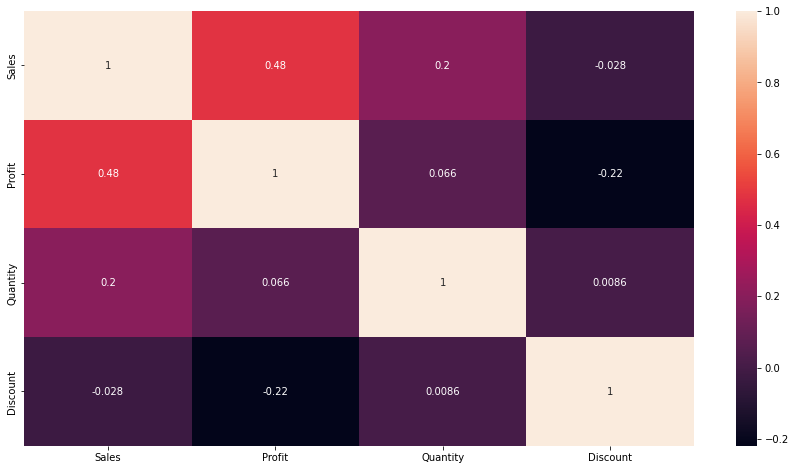

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_dataset.corr(), annot=True)

## 1.2) Exploring Categorical Features

In [15]:
cat_dataset.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category  
0        42420  South        Furniture    Bookcases  
1        42420  South        Furniture       Chairs  
2        90036   West  Office Supplies       Labels  
3        33311  South        Furniture       Tables  
4        33311  South  Office Supplies      Storage

In [16]:
def valueCounts(feature):
  print(feature)
  print(cat_dataset[feature].value_counts())
  print()

In [17]:
for feature in cat_features:
   valueCounts(feature)

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Country
United States    9994
Name: Country, dtype: int64

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Co

### 1.2.1) Histplots

In [18]:
def histplot(feature):
  px.histogram(data_frame=cat_dataset, x=feature).show()

In [19]:
for feature in cat_features:
  histplot(feature)

### 1.2.2) Box Plots

In [20]:
def boxPlot(feature):
  plt.figure(figsize=(20,8))
  sns.boxplot(x=feature, y='Profit', data = dataset, palette='rainbow')
  plt.title("Profit by {} Class".format(feature))

In [21]:
# for feature in cat_features:
#   boxPlot(feature)

### 1.2.3) Point plots

In [22]:
def pointPlot(feature):
  plt.figure(figsize=(20,8))
  sns.pointplot(x=feature, y='Profit', data = dataset, palette='rainbow')
  plt.title("Profit by {} Class".format(feature))

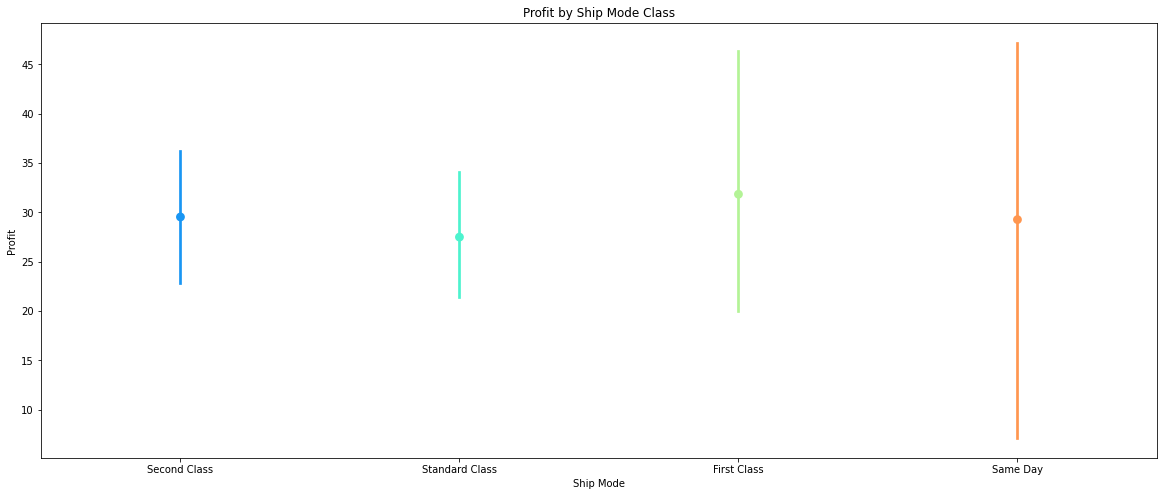

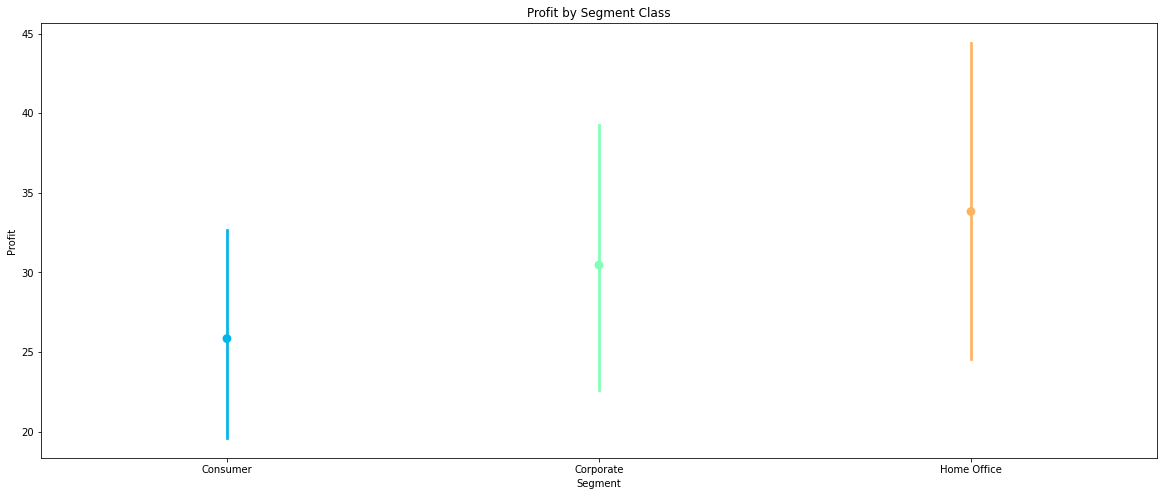

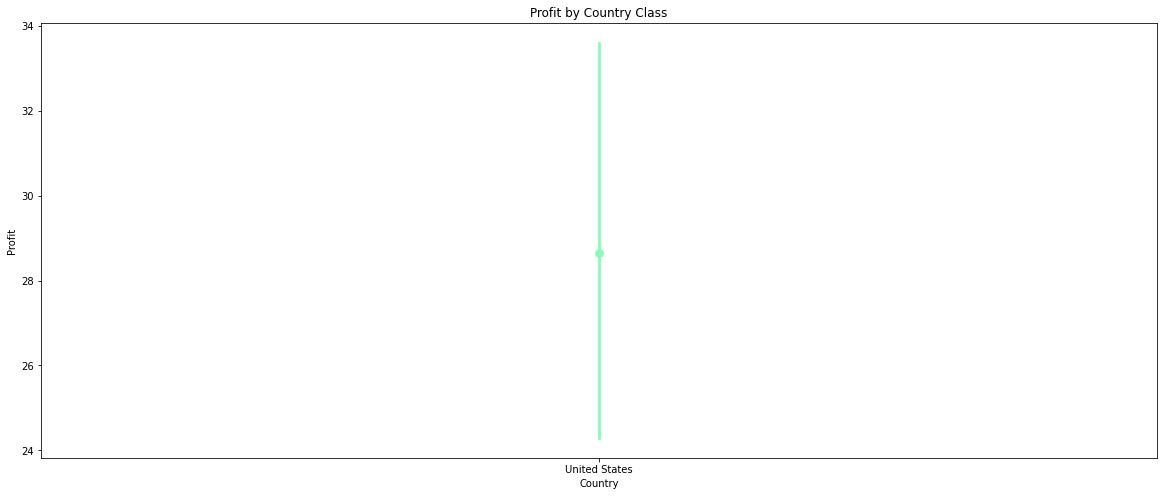

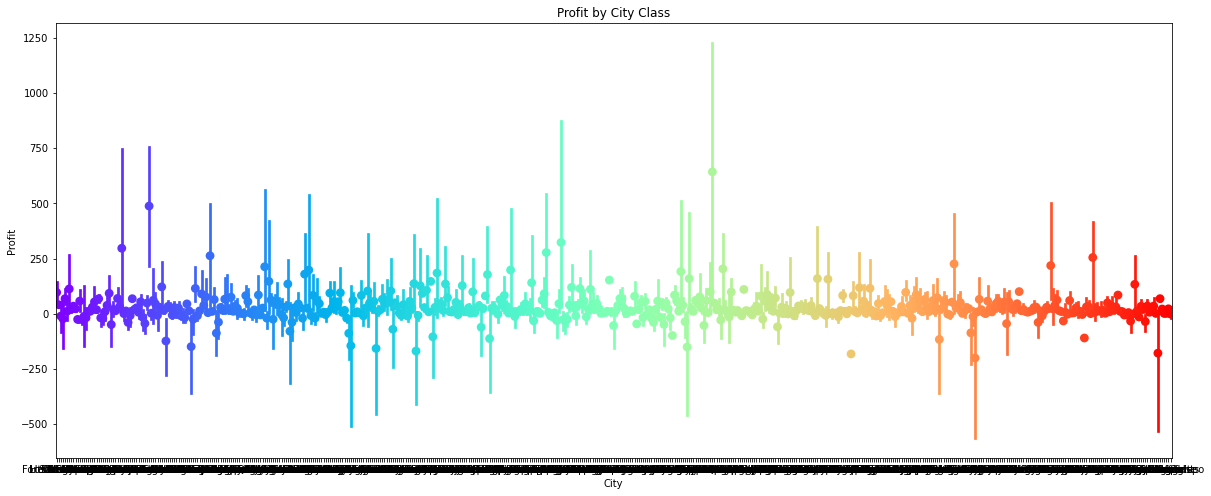

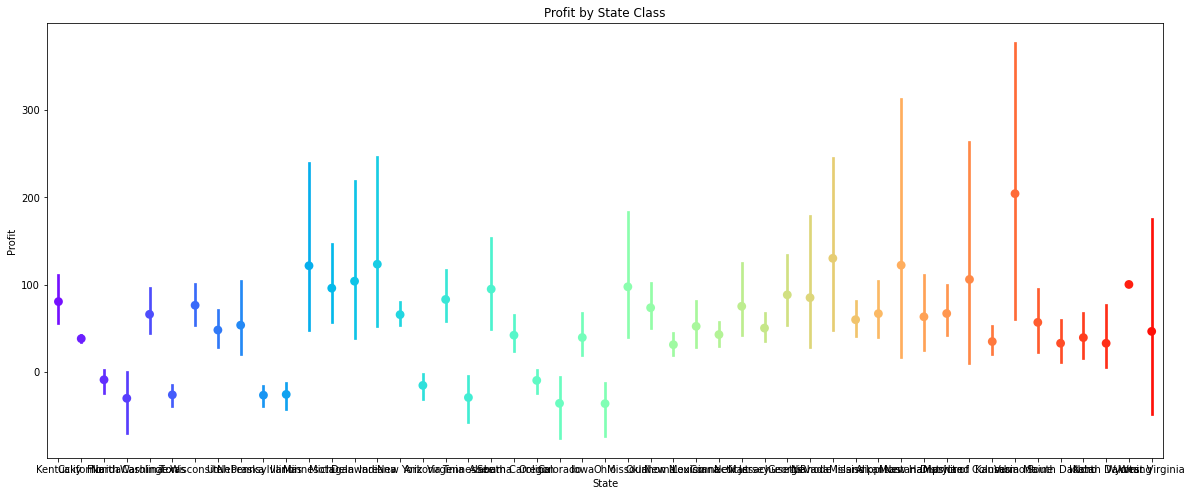

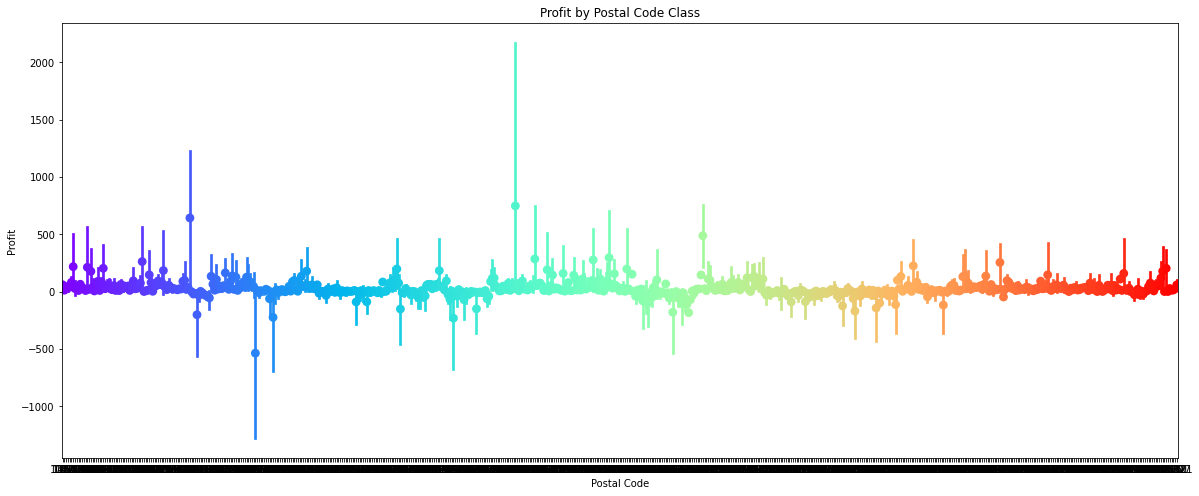

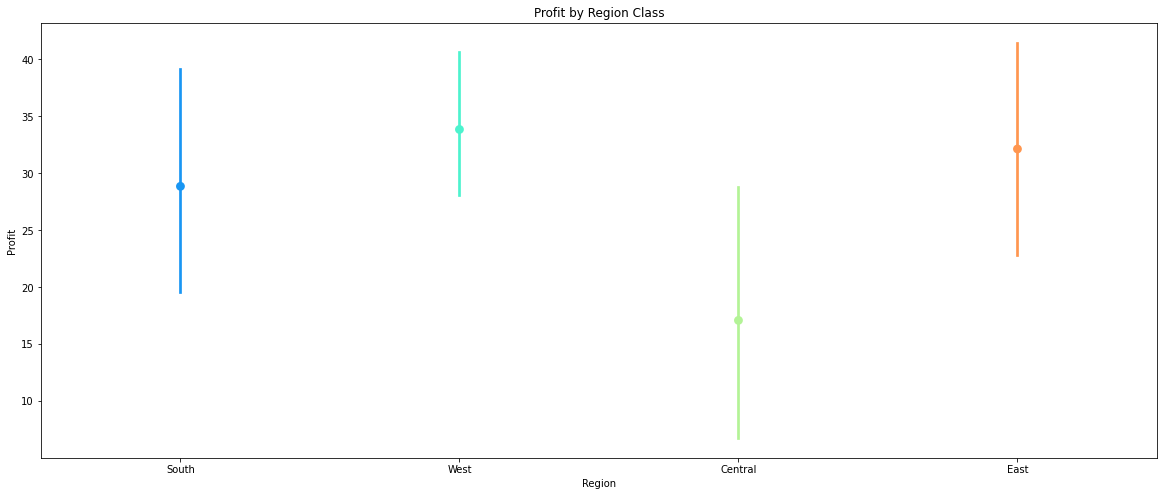

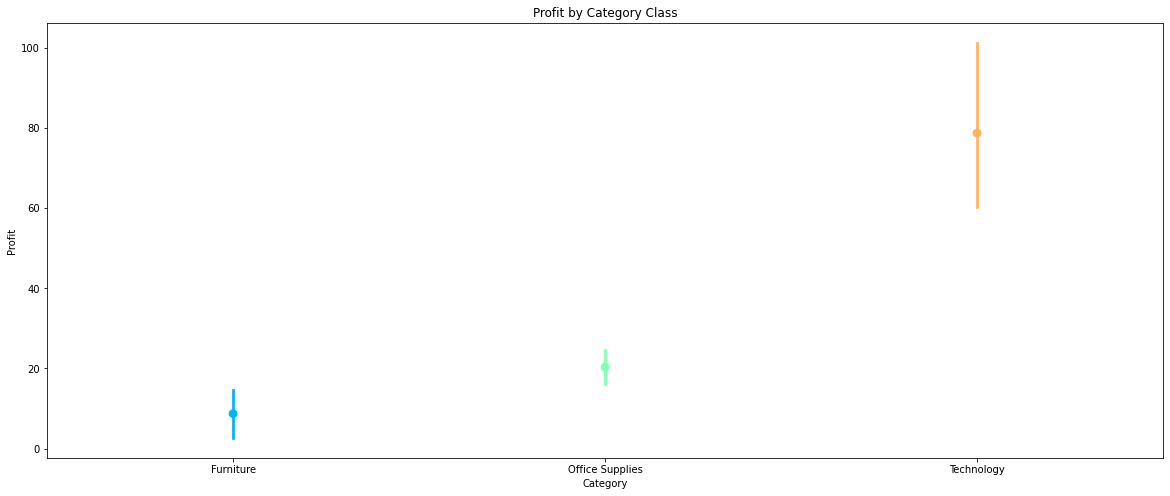

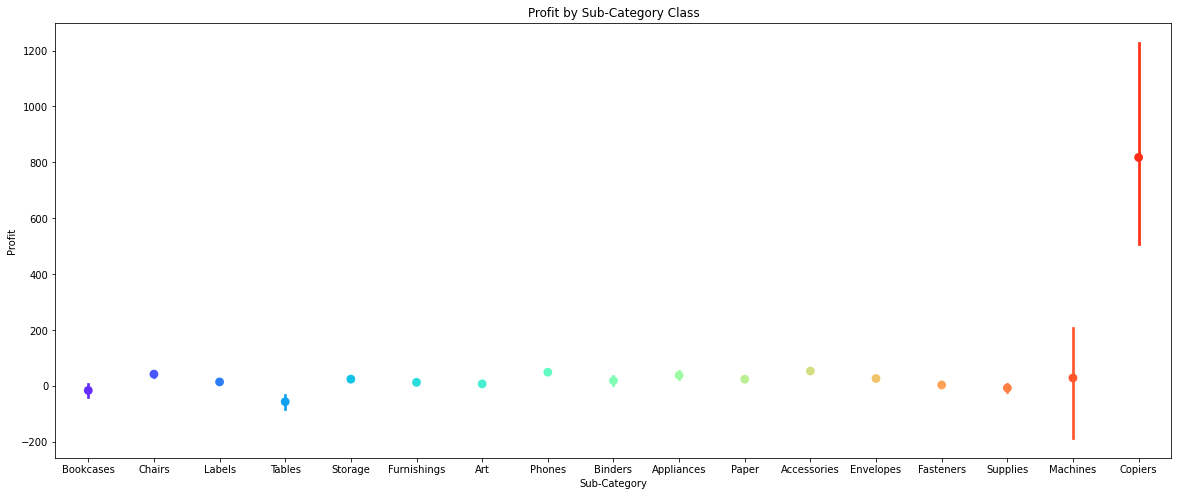

In [23]:
for feature in cat_features:
  pointPlot(feature)

### 1.2.4) Swarm Plots

In [24]:
def swarmPlot(feature):
  plt.figure(figsize=(10,7))
  sns.swarmplot(x=feature, y='Profit', data=dataset, dodge=True, palette='viridis')
  plt.title("Profit by {} Class".format(feature))

In [25]:
# for feature in cat_features:
#   swarmPlot(feature)

### 1.2.5) Strip Plots

In [26]:
def stripPlots(feature):
  plt.figure(figsize=(20,7))
  sns.stripplot(x=feature, y='Profit', data=dataset, dodge=True, palette='viridis')
  plt.title("Profit by {} Class".format(feature))

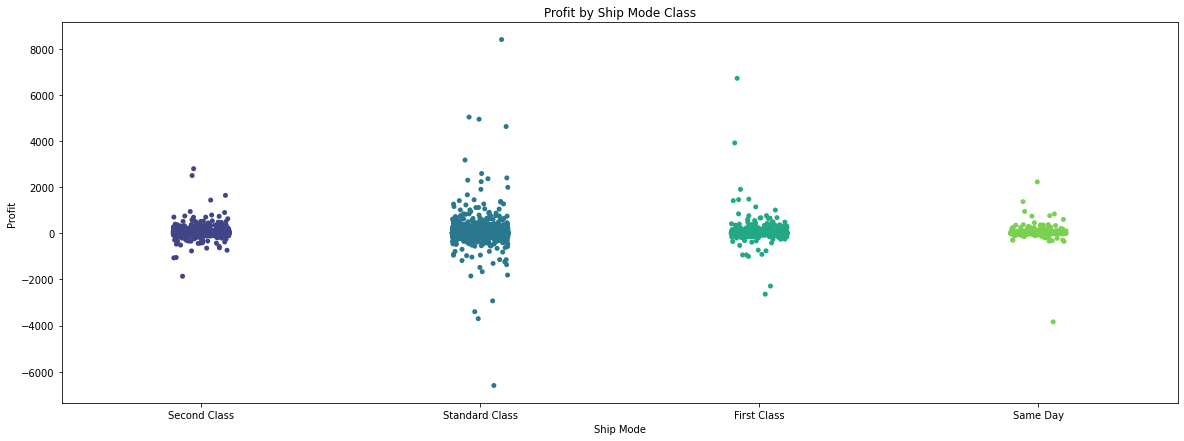

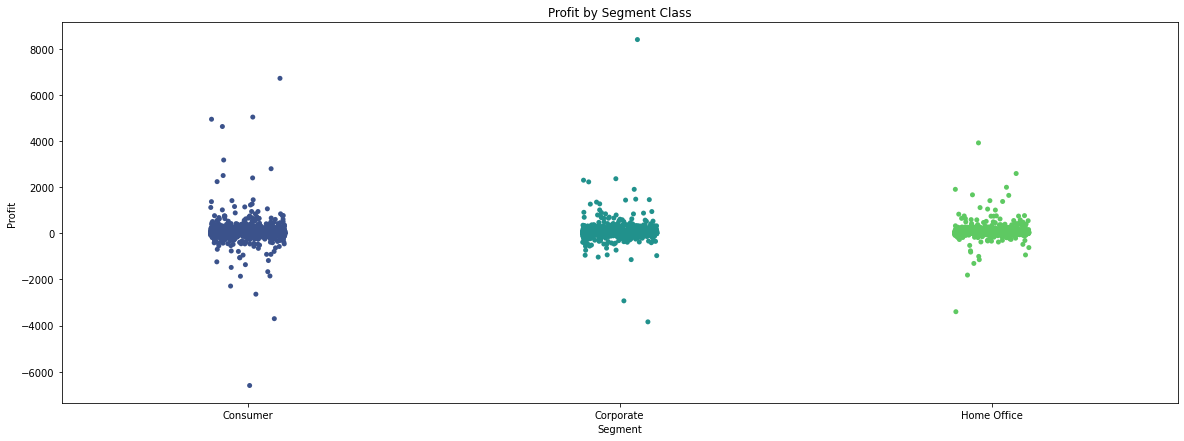

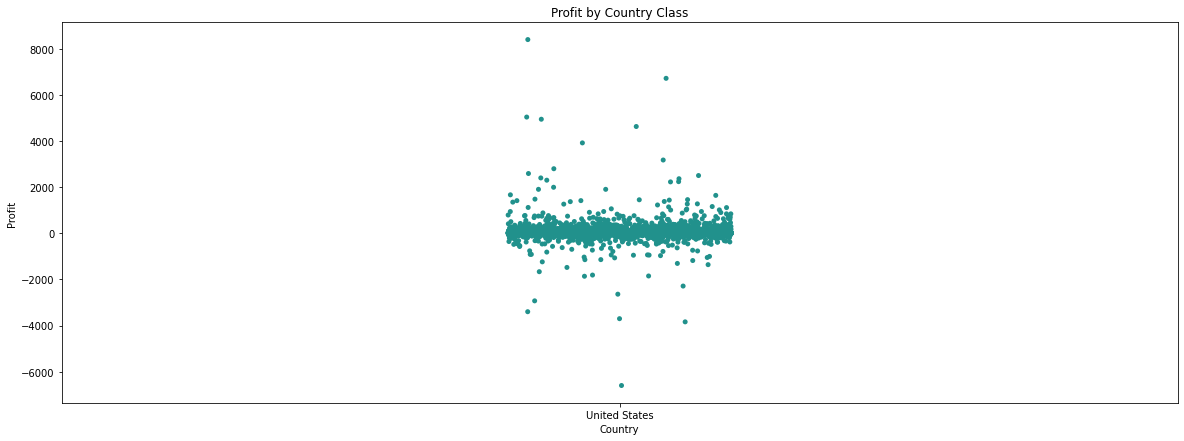

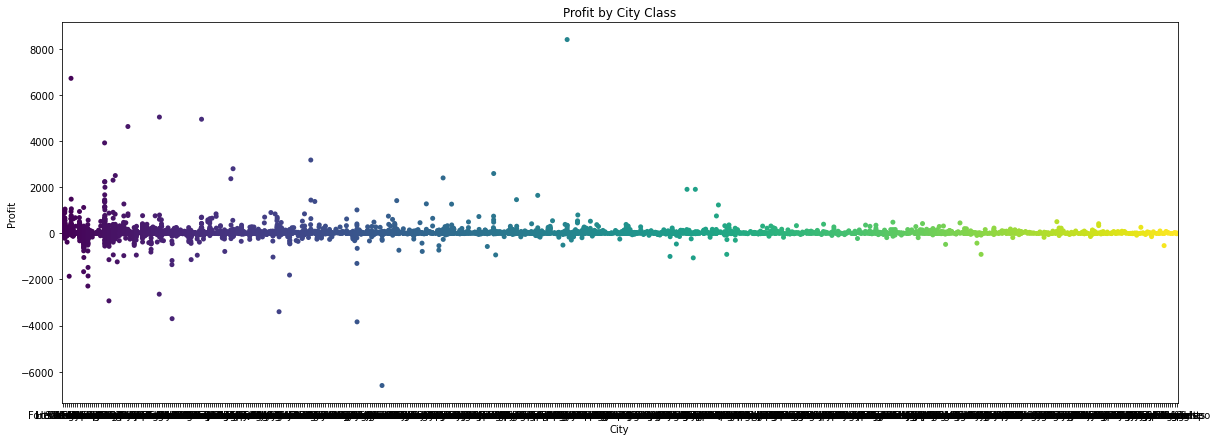

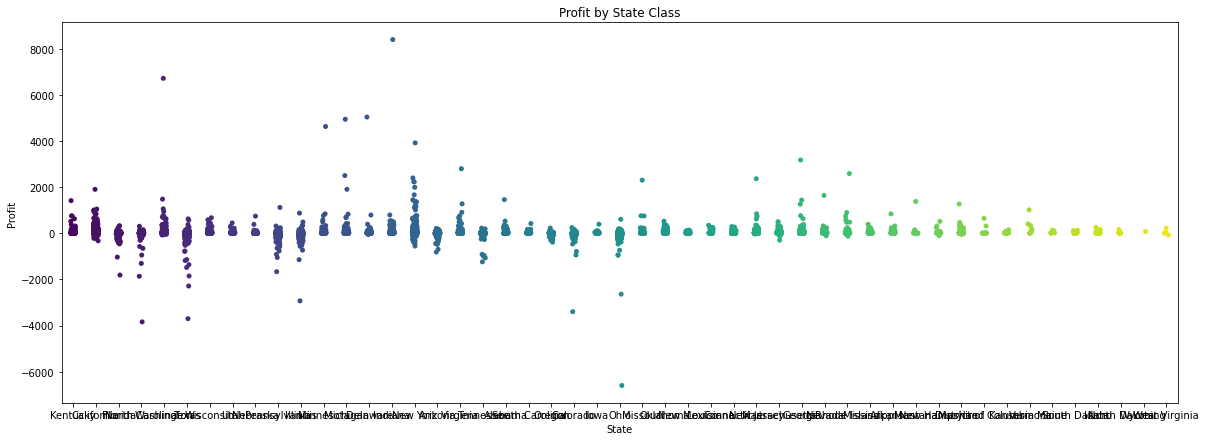

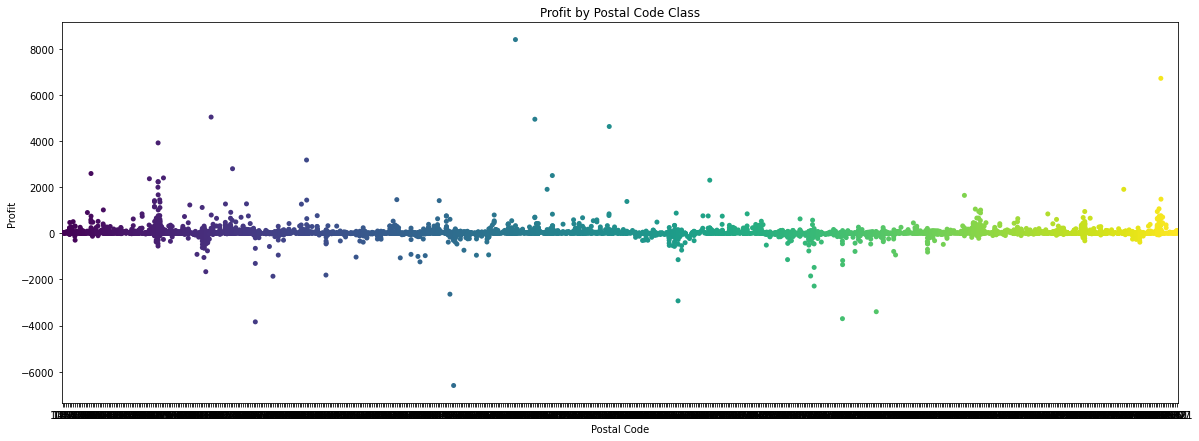

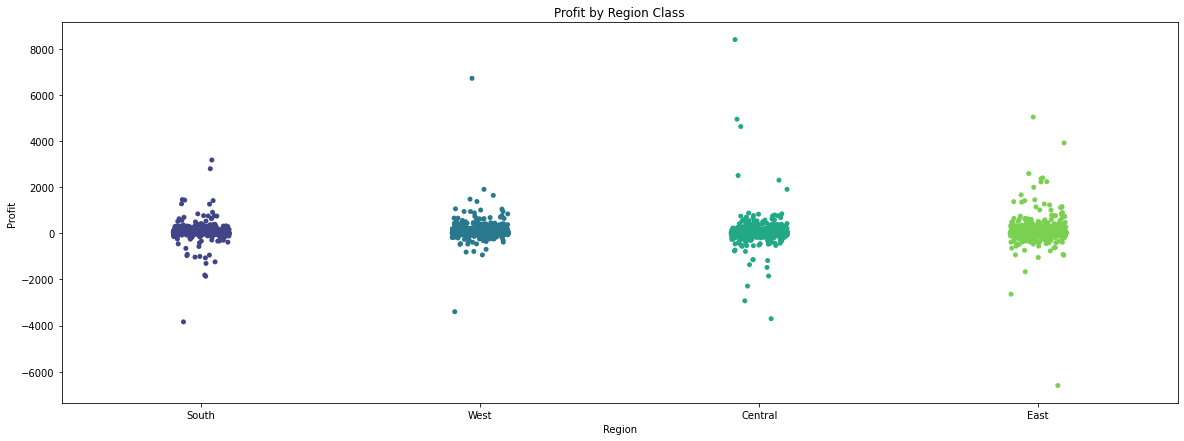

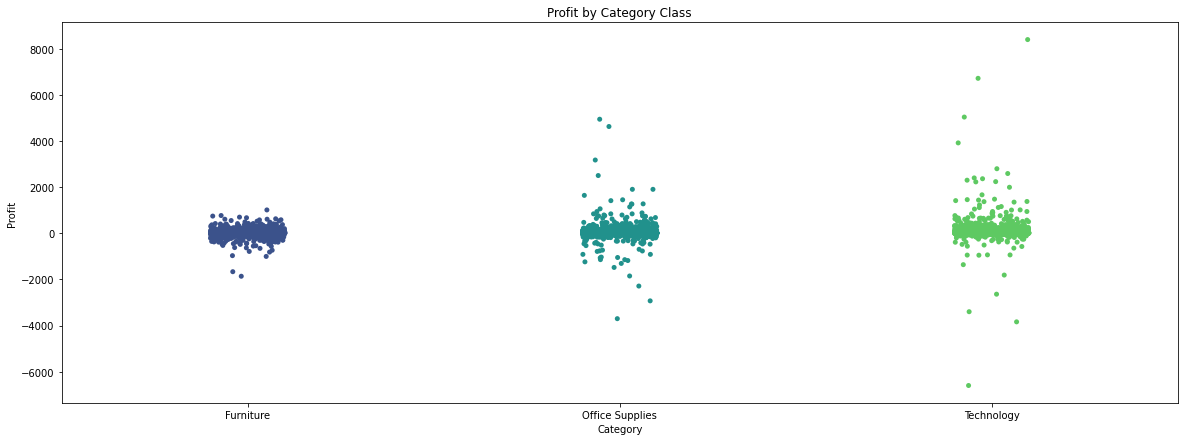

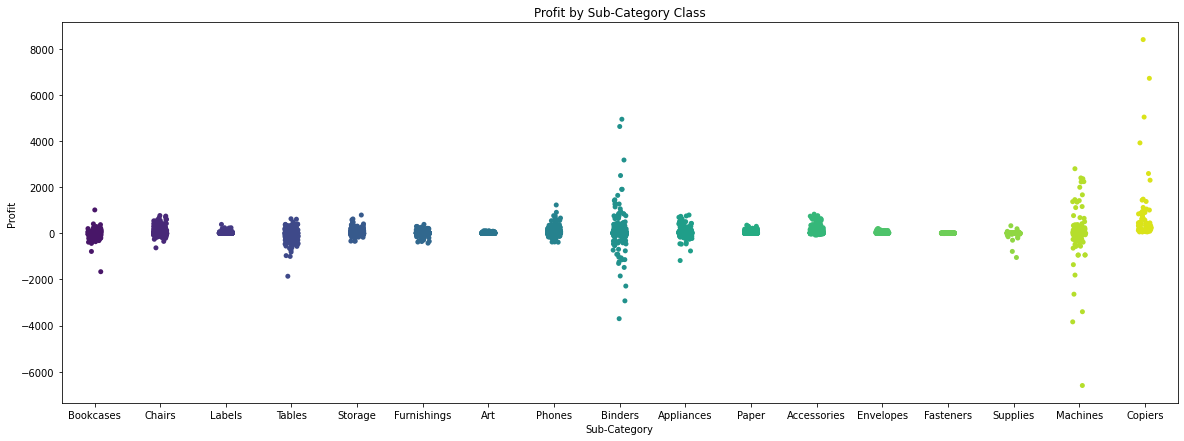

In [27]:
for feature in cat_features:
  stripPlots(feature)

### 1.2.6) Violin Plots

In [28]:
def violinPlot(feature):
  plt.figure(figsize=(20,7))
  sns.violinplot(x=feature, y='Profit', data=dataset, split=True, palette='rainbow')
  plt.title("Profit by {} Class".format(feature))

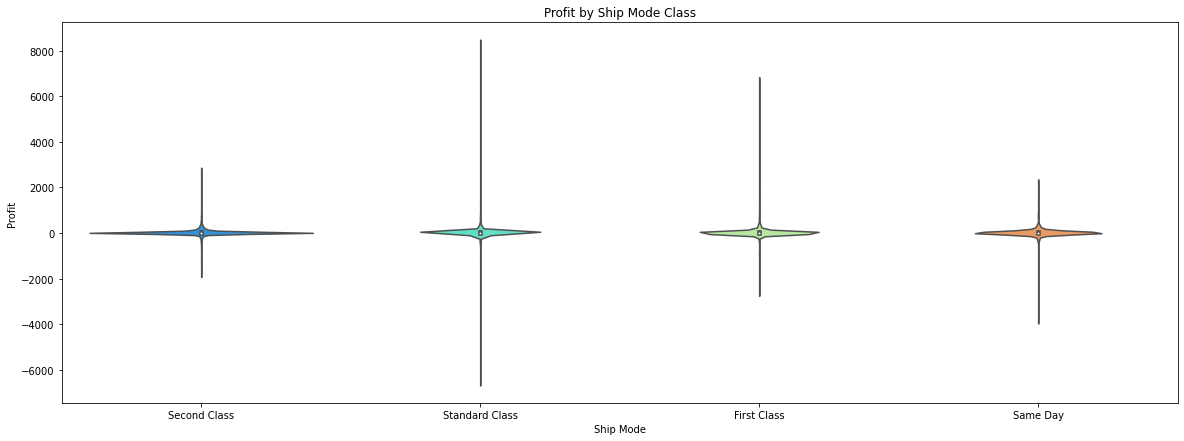

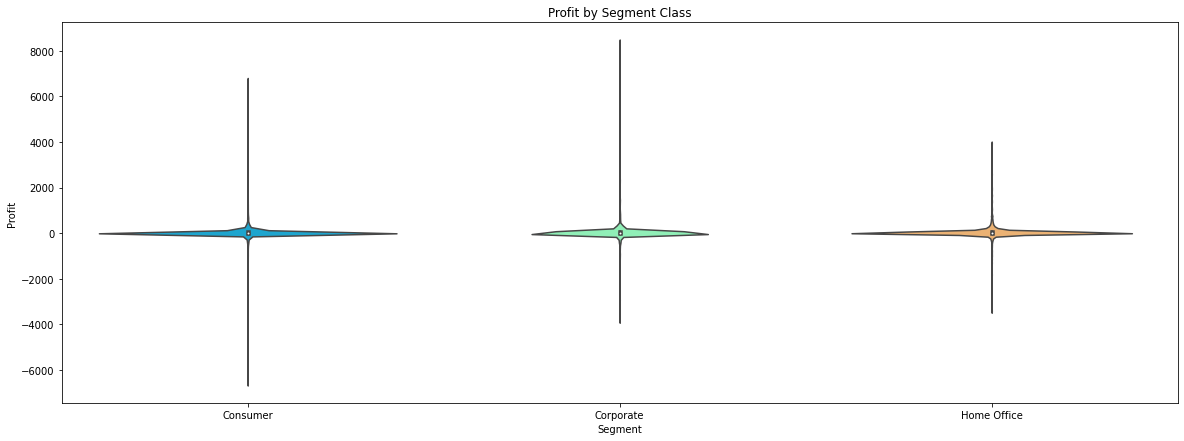

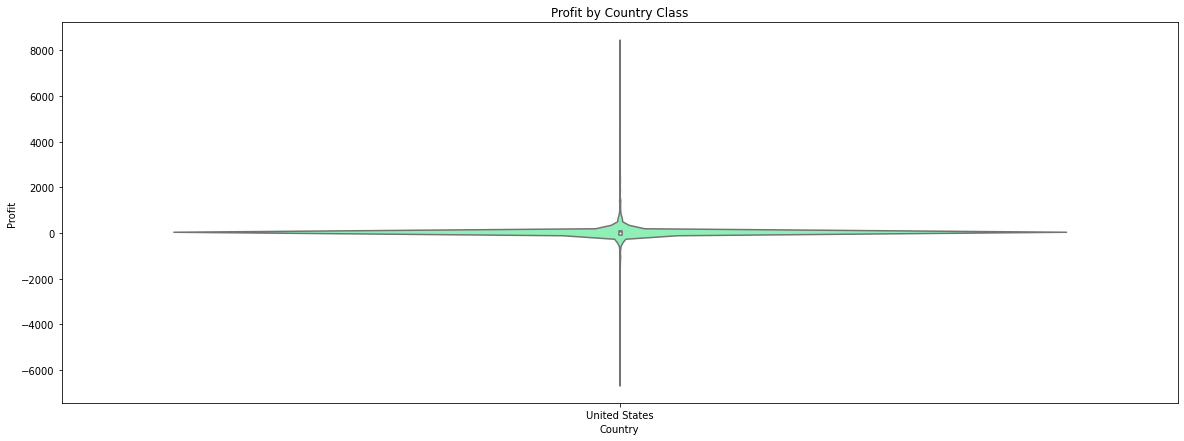

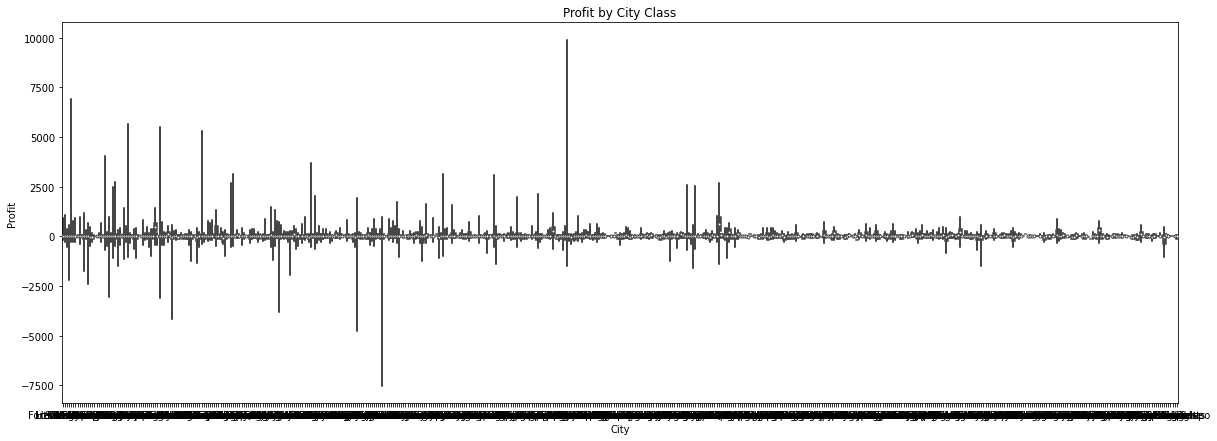

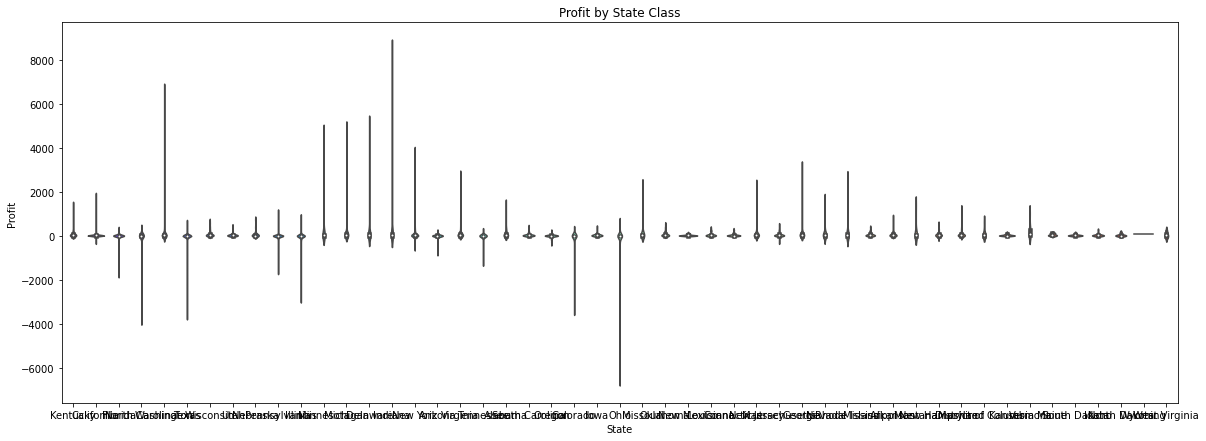

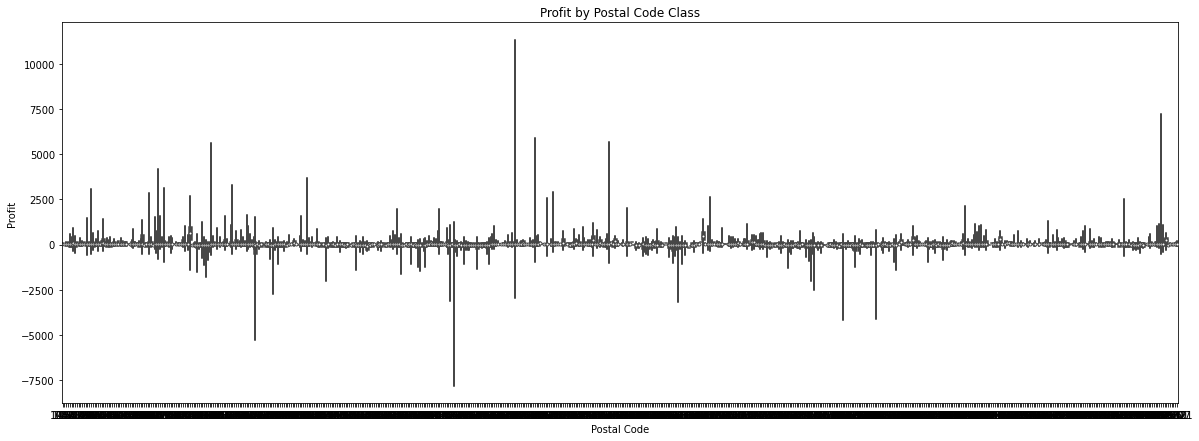

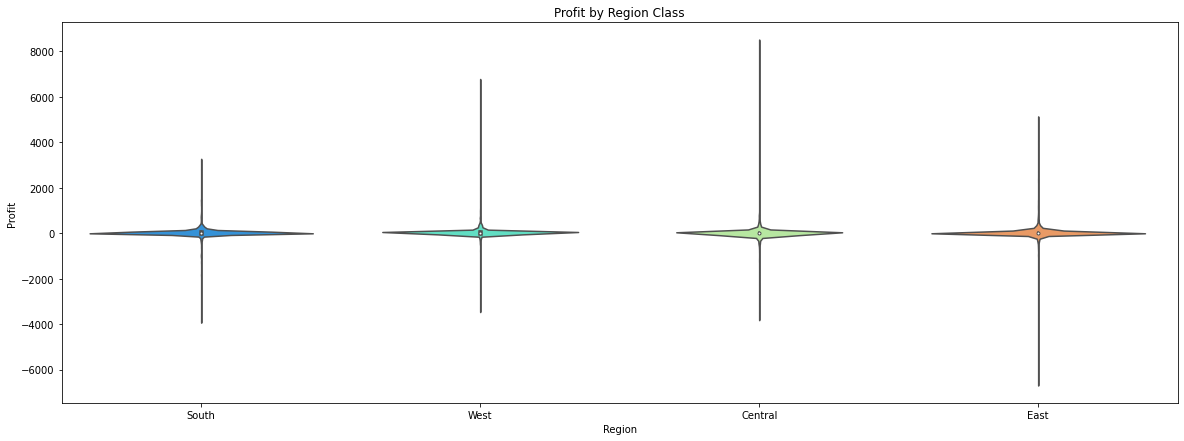

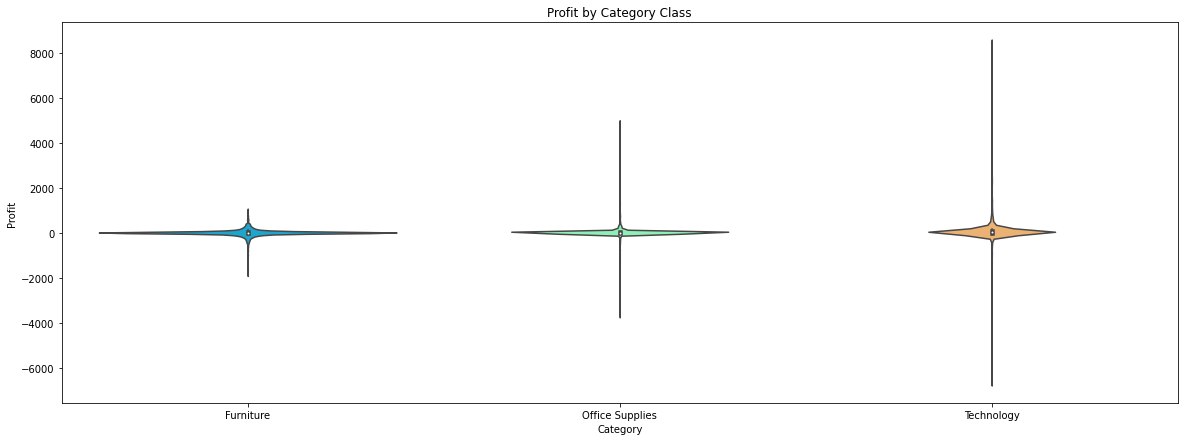

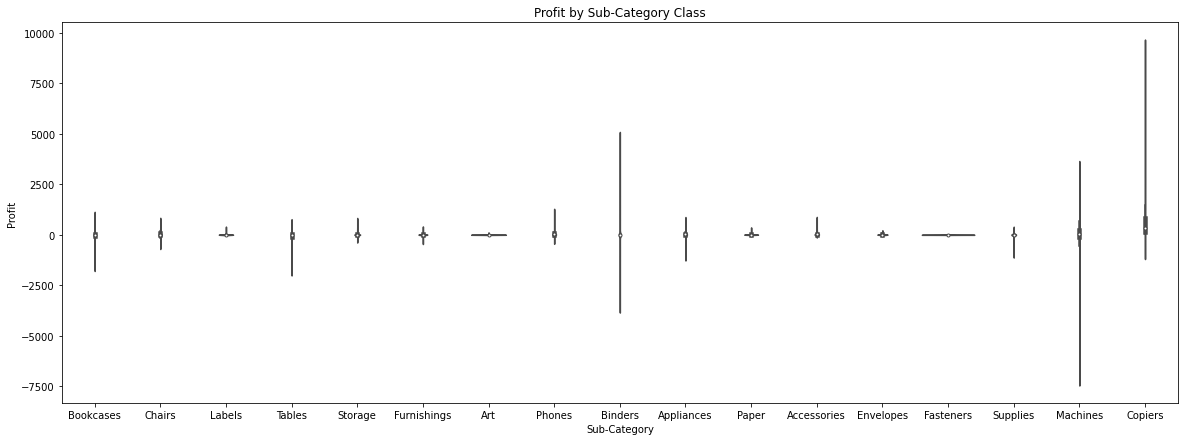

In [29]:
for feature in cat_features:
  violinPlot(feature)

### 1.2.7) Which category has highest discounts?

In [30]:
discountFeatures = ['Segment', 'Category', 'Sub-Category']

In [31]:
def boxPlotDiscount(feature):
  plt.figure(figsize=(15,10))
  sns.boxplot(data=dataset, x=feature, y='Discount')

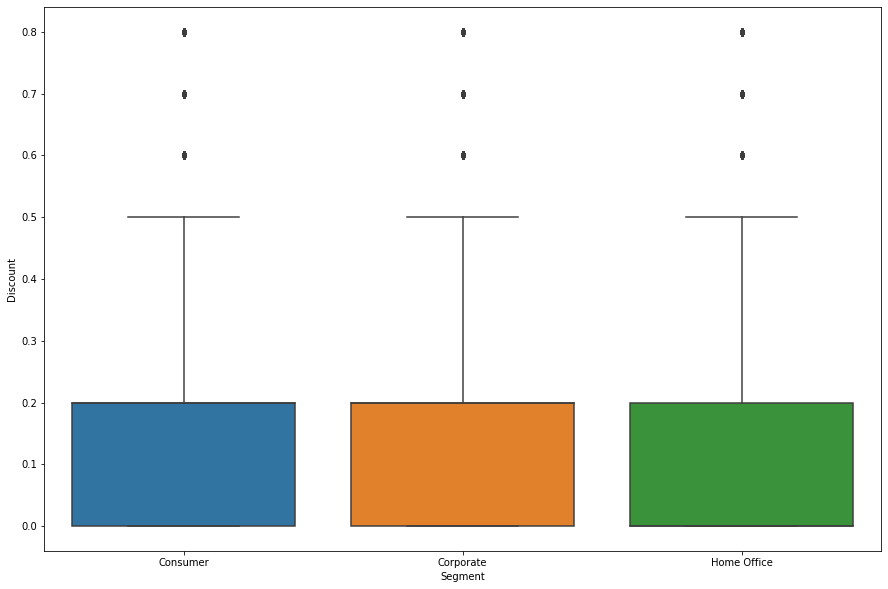

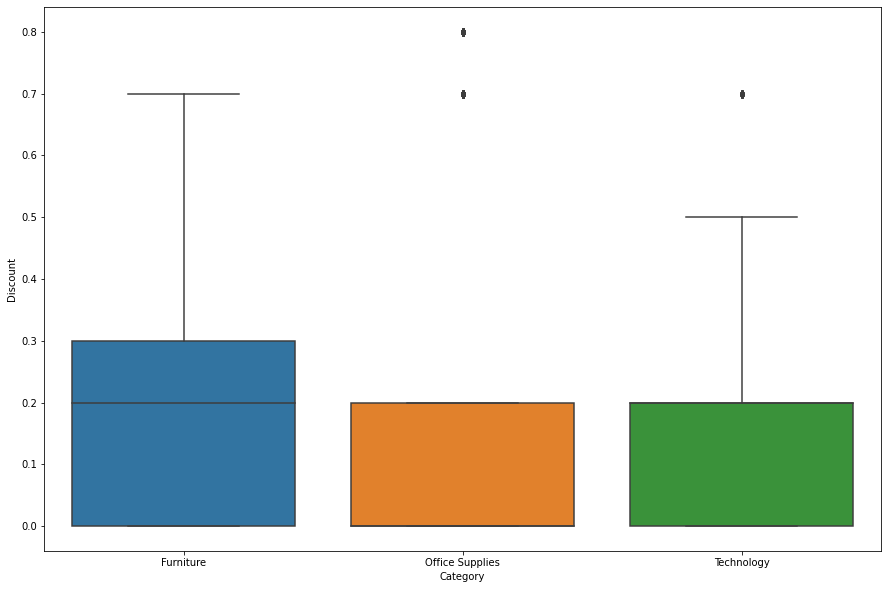

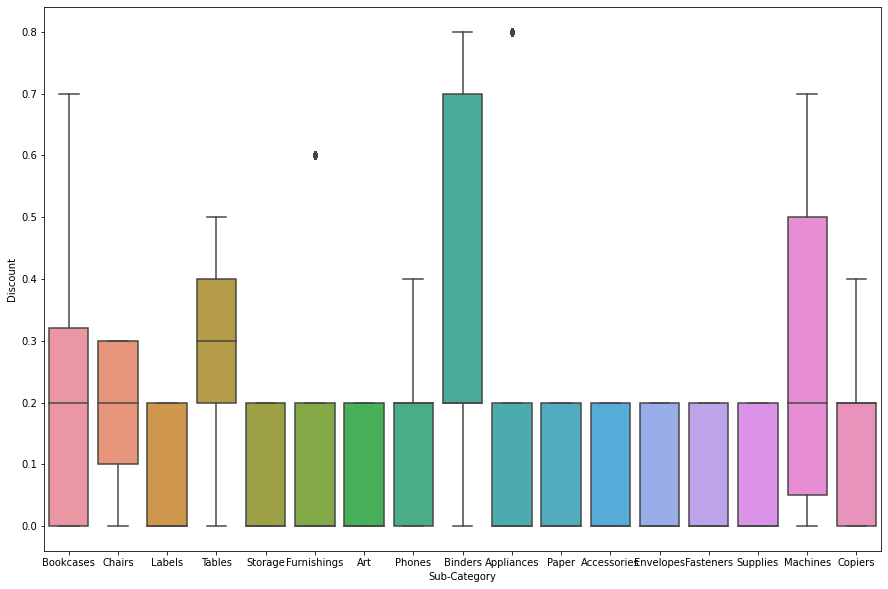

In [32]:
for feature in discountFeatures:
  boxPlotDiscount(feature)

### 1.2.8) Correlation of categorical features with profit

In [33]:
# plt.figure(figsize=(15,10))
# sns.displot(dataset['Profit'], bins=20)
def dist(data):
  px.histogram(data,nbins=50).show()

In [34]:
dataset['Transformed_Profit'] = dataset['Profit']**(1/3)
dataset['Transformed_Profit_Yeo_Johnson'], _ = yeojohnson(dataset['Profit'])

trans_profit = dataset['Transformed_Profit']
trans_profit_yj = dataset['Transformed_Profit_Yeo_Johnson']

In [35]:
dist(trans_profit)

In [36]:
dist(trans_profit_yj)

In [37]:
def isNormal(value):
  stats, p = shapiro(value)
  if p > .05 : print('Normal')
  else : print('Not normal')
  print(value.skew())

In [38]:
isNormal(trans_profit)

Normal
2.2459489207949663


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



In [39]:
isNormal(trans_profit_yj)

Not normal
3.728364233482537


In [40]:
cat_features

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoded_dataset = dataset.copy()

In [43]:
le = LabelEncoder()

In [44]:
def lableEncode(feature):
  encoded_dataset['En_{}'.format(feature)] = le.fit_transform(encoded_dataset[feature])

In [45]:
for feature in ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']:
  lableEncode(feature)

In [46]:
encoded_dataset.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  ...  Discount  \
0        42420  South        Furniture    Bookcases  261.9600  ...      0.00   
1        42420  South        Furniture       Chairs  731.9400  ...      0.00   
2        90036   West  Office Supplies       Labels   14.6200  ...      0.00   
3        33311  South        Furniture       Tables  957.5775  ...      0.45   
4        33311  South  Office Supplies      Storage   22.3680  ...      0.20   

     Profit  Transformed_Profit  Transformed_Profit_Yeo_Johnson  En_Ship Mode  \
0   41.9136            3.473641                       40.518534             2   
1  219.5820            6.032985                      208.343056             2   
2    6.8714            1.901144                        6.760960             2   
3 -383.0310                 NaN                     -406.372730             3   
4    2.5164            1.360170                        2.493854             3   

   En_Segment  En_State  En_Region  En_Category  En_Sub-Category  
0           0        15          2            0                4  
1           0        15          2            0                5  
2           1         3          3            1               10  
3           0         8          2            0               16  
4           0         8          2            1               14  

[5 rows x 21 columns]

In [47]:
encoded_dataset.rename(columns={'En_Ship Mode': 'En_Ship_Mode', 'En_Sub-Category': 'En_Sub_Category'}, inplace=True)

In [48]:
encoded_dataset.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  ...  Discount  \
0        42420  South        Furniture    Bookcases  261.9600  ...      0.00   
1        42420  South        Furniture       Chairs  731.9400  ...      0.00   
2        90036   West  Office Supplies       Labels   14.6200  ...      0.00   
3        33311  South        Furniture       Tables  957.5775  ...      0.45   
4        33311  South  Office Supplies      Storage   22.3680  ...      0.20   

     Profit  Transformed_Profit  Transformed_Profit_Yeo_Johnson  En_Ship_Mode  \
0   41.9136            3.473641                       40.518534             2   
1  219.5820            6.032985                      208.343056             2   
2    6.8714            1.901144                        6.760960             2   
3 -383.0310                 NaN                     -406.372730             3   
4    2.5164            1.360170                        2.493854             3   

   En_Segment  En_State  En_Region  En_Category  En_Sub_Category  
0           0        15          2            0                4  
1           0        15          2            0                5  
2           1         3          3            1               10  
3           0         8          2            0               16  
4           0         8          2            1               14  

[5 rows x 21 columns]

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
def checkCorr(feature):
  print('For feature {}'.format(feature))
  mod = ols('{}~Transformed_Profit'.format(feature), data=encoded_dataset).fit()
  aov = sm.stats.anova_lm(mod, type=2)
  print(aov)
  print()

In [51]:
for feature in ['En_Ship_Mode', 'En_Segment', 'En_State', 'En_Region', 'En_Category', 'En_Sub_Category']:
  checkCorr(feature)

For feature En_Ship_Mode
                        df       sum_sq   mean_sq         F    PR(>F)
Transformed_Profit     1.0     0.204174  0.204174  0.169299  0.680747
Residual            8121.0  9793.894066  1.205996       NaN       NaN

For feature En_Segment
                        df       sum_sq   mean_sq         F   PR(>F)
Transformed_Profit     1.0     2.269017  2.269017  3.880983  0.04887
Residual            8121.0  4747.942482  0.584650       NaN      NaN

For feature En_State
                        df        sum_sq     mean_sq         F    PR(>F)
Transformed_Profit     1.0  2.789685e+02  278.968525  1.165916  0.280274
Residual            8121.0  1.943111e+06  239.269861       NaN       NaN

For feature En_Region
                        df        sum_sq   mean_sq         F    PR(>F)
Transformed_Profit     1.0      1.873899  1.873899  1.423503  0.232863
Residual            8121.0  10690.482127  1.316400       NaN       NaN

For feature En_Category
                        df      